In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import ipywidgets as widgets
from IPython.display import display
import tqdm as tqdm
from colorthief import ColorThief
from collections import defaultdict

C:\Users\user\AppData\Local\Temp\ipykernel_3092\1297589685.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("C:\\Users\\user\\Downloads\\Untitled spreadsheet - Data.csv")
df.head()

Year (semi-) final Edition Jury or Televoting From country To country  \
0  1957             f   1957f                  J      Austria    Austria   
1  1957             f   1957f                  J      Austria    Belgium   
2  1957             f   1957f                  J      Austria    Denmark   
3  1957             f   1957f                  J      Austria     France   
4  1957             f   1957f                  J      Austria    Germany   

   Points       Duplicate  
0             0         x  
1             0       NaN  
2             0       NaN  
3             0       NaN  
4             0       NaN

In [3]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Year', '(semi-) final', 'Edition', 'Jury or Televoting',
       'From country', 'To country', 'Points', 'Duplicate'],
      dtype='object')


In [4]:
df['Total'] = df.groupby(['Year', 'To country'])['Points'].transform('sum')

In [5]:
df_pivot = df.pivot_table(index=['Year', 'To country'], columns='From country', values='Points', fill_value=0)
df_pivot.reset_index(inplace=True)

In [6]:
df_pivot.head()

From country  Year To country  Albania  Andorra  Armenia  Australia  Austria  \
0             1957    Austria      0.0      0.0      0.0        0.0      0.0   
1             1957    Belgium      0.0      0.0      0.0        0.0      0.0   
2             1957    Denmark      0.0      0.0      0.0        0.0      0.0   
3             1957     France      0.0      0.0      0.0        0.0      0.0   
4             1957    Germany      0.0      0.0      0.0        0.0      0.0   

From country  Azerbaijan  Belarus  Belgium  ...  Serbia & Montenegro  \
0                    0.0      0.0      0.0  ...                  0.0   
1                    0.0      0.0      0.0  ...                  0.0   
2                    0.0      0.0      0.0  ...                  0.0   
3                    0.0      0.0      2.0  ...                  0.0   
4                    0.0      0.0      1.0  ...                  0.0   

From country  Slovakia  Slovenia  Spain  Sweden  Switzerland  Turkey  Ukraine  \
0                  0.0       0.0    0.0     0.0          0.0     0.0      0.0   
1                  0.0       0.0    0.0     0.0          1.0     0.0      0.0   
2                  0.0       0.0    0.0     0.0          0.0     0.0      0.0   
3                  0.0       0.0    0.0     0.0          0.0     0.0      0.0   
4                  0.0       0.0    0.0     0.0          0.0     0.0      0.0   

From country  United Kingdom  Yugoslavia  
0                        2.0         0.0  
1                        0.0         0.0  
2                        2.0         0.0  
3                        2.0         0.0  
4                        0.0         0.0  

[5 rows x 58 columns]

In [7]:
print(df_pivot.columns)

Index(['Year', 'To country', 'Albania', 'Andorra', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia & Herzegovina',
       'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco',
       'Montenegro', 'Morocco', 'Netherlands', 'North Macedonia', 'Norway',
       'Poland', 'Portugal', 'Rest of the World', 'Rest of the world',
       'Romania', 'Russia', 'San Marino', 'Serbia', 'Serbia & Montenegro',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'Ukraine', 'United Kingdom', 'Yugoslavia'],
      dtype='object', name='From country')


In [8]:
columns_to_convert=['Year','Albania', 'Andorra', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia & Herzegovina',
       'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco',
       'Montenegro', 'Morocco', 'Netherlands', 'North Macedonia', 'Norway',
       'Poland', 'Portugal', 'Rest of the World', 'Rest of the world',
       'Romania', 'Russia', 'San Marino', 'Serbia', 'Serbia & Montenegro',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'Ukraine', 'United Kingdom', 'Yugoslavia']

In [9]:
df_pivot[columns_to_convert] = df_pivot[columns_to_convert].astype(int)

In [10]:
df_pivot.head()

From country  Year To country  Albania  Andorra  Armenia  Australia  Austria  \
0             1957    Austria        0        0        0          0        0   
1             1957    Belgium        0        0        0          0        0   
2             1957    Denmark        0        0        0          0        0   
3             1957     France        0        0        0          0        0   
4             1957    Germany        0        0        0          0        0   

From country  Azerbaijan  Belarus  Belgium  ...  Serbia & Montenegro  \
0                      0        0        0  ...                    0   
1                      0        0        0  ...                    0   
2                      0        0        0  ...                    0   
3                      0        0        2  ...                    0   
4                      0        0        1  ...                    0   

From country  Slovakia  Slovenia  Spain  Sweden  Switzerland  Turkey  Ukraine  \
0                    0         0      0       0            0       0        0   
1                    0         0      0       0            1       0        0   
2                    0         0      0       0            0       0        0   
3                    0         0      0       0            0       0        0   
4                    0         0      0       0            0       0        0   

From country  United Kingdom  Yugoslavia  
0                          2           0  
1                          0           0  
2                          2           0  
3                          2           0  
4                          0           0  

[5 rows x 58 columns]

In [11]:
df_pivot.columns

Index(['Year', 'To country', 'Albania', 'Andorra', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia & Herzegovina',
       'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco',
       'Montenegro', 'Morocco', 'Netherlands', 'North Macedonia', 'Norway',
       'Poland', 'Portugal', 'Rest of the World', 'Rest of the world',
       'Romania', 'Russia', 'San Marino', 'Serbia', 'Serbia & Montenegro',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'Ukraine', 'United Kingdom', 'Yugoslavia'],
      dtype='object', name='From country')

In [12]:
df_pivot.columns.name = None
df_pivot.reset_index(drop=True, inplace=True)
df_pivot.columns

Index(['Year', 'To country', 'Albania', 'Andorra', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia & Herzegovina',
       'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco',
       'Montenegro', 'Morocco', 'Netherlands', 'North Macedonia', 'Norway',
       'Poland', 'Portugal', 'Rest of the World', 'Rest of the world',
       'Romania', 'Russia', 'San Marino', 'Serbia', 'Serbia & Montenegro',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'Ukraine', 'United Kingdom', 'Yugoslavia'],
      dtype='object')

In [13]:
df_pivot['Total'] = df_pivot.iloc[:, 2:].sum(axis=1)

In [14]:
df_pivot['Rank'] = df_pivot.groupby('Year')['Total'].rank(ascending=False, method='min').astype(int)

In [15]:
df_pivot.rename(columns={'To country': 'Country'}, inplace=True)

In [16]:
columns = df_pivot.columns.tolist()

last_columns = columns[-2:]
columns = columns[:-2]
columns.insert(2, last_columns[0])
columns.insert(3, last_columns[1])

In [17]:
df_pivot.head()

Year  Country  Albania  Andorra  Armenia  Australia  Austria  Azerbaijan  \
0  1957  Austria        0        0        0          0        0           0   
1  1957  Belgium        0        0        0          0        0           0   
2  1957  Denmark        0        0        0          0        0           0   
3  1957   France        0        0        0          0        0           0   
4  1957  Germany        0        0        0          0        0           0   

   Belarus  Belgium  ...  Slovenia  Spain  Sweden  Switzerland  Turkey  \
0        0        0  ...         0      0       0            0       0   
1        0        0  ...         0      0       0            1       0   
2        0        0  ...         0      0       0            0       0   
3        0        2  ...         0      0       0            0       0   
4        0        1  ...         0      0       0            0       0   

   Ukraine  United Kingdom  Yugoslavia  Total  Rank  
0        0               2           0      3    10  
1        0               0           0      5     8  
2        0               2           0     10     3  
3        0               2           0     17     2  
4        0               0           0      8     4  

[5 rows x 60 columns]

In [18]:
df_pivot.tail(5)

Year         Country  Albania  Andorra  Armenia  Australia  Austria  \
1659  2023           Spain        1        0        6          4        0   
1660  2023          Sweden       11        0        8          8        7   
1661  2023     Switzerland        7        0        2          0        3   
1662  2023         Ukraine        0        0        2          0        5   
1663  2023  United Kingdom        0        0        0          0        0   

      Azerbaijan  Belarus  Belgium  ...  Slovenia  Spain  Sweden  Switzerland  \
1659           7        0        6  ...         2      0       0            3   
1660          10        0        9  ...         5      8       0            6   
1661           4        0        0  ...         1      0       7            0   
1662           4        0        1  ...         0     10       4            0   
1663           0        0        0  ...         0      0       4            0   

      Turkey  Ukraine  United Kingdom  Yugoslavia  Total  Rank  
1659       0        0               5           0     93    21  
1660       0        7               8           0    292     2  
1661       0        0               0           0    106    20  
1662       0        0               4           0    175     6  
1663       0        4               0           0     19    28  

[5 rows x 60 columns]

In [19]:
votes_melted = df_pivot.melt(id_vars=['Year', 'Country', 'Total', 'Rank'], var_name='Source Country', value_name='points')

In [20]:
votes_melted.head()

Year  Country  Total  Rank Source Country  points
0  1957  Austria      3    10        Albania       0
1  1957  Belgium      5     8        Albania       0
2  1957  Denmark     10     3        Albania       0
3  1957   France     17     2        Albania       0
4  1957  Germany      8     4        Albania       0

In [21]:
graphs_by_year = {}

for year in votes_melted['Year'].unique():
    votes_year = votes_melted[votes_melted['Year'] == year]
    G_year = nx.from_pandas_edgelist(votes_year,
                                     source='Source Country',
                                     target='Country',
                                     edge_attr='points',
                                     create_using=nx.DiGraph())
    graphs_by_year[year] = G_year

In [22]:
def draw_graph(year):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graphs_by_year[year])
    nx.draw_networkx(graphs_by_year[year], node_color='blue', pos=pos, node_size=100, edge_color='gray', with_labels=True)
    plt.title(f'Graph for Year {year}')
    plt.show()

In [23]:
year_slider = widgets.IntSlider(value=1957, min=1957, max=2023, step=1, description='Year:', style={'description_width': 'initial'},  layout=widgets.Layout(width='80%'), continuous_update=False)
widgets.interact(draw_graph, year=year_slider)

interactive(children=(IntSlider(value=1957, continuous_update=False, description='Year:', layout=Layout(width=…

<function __main__.draw_graph(year)>

In [24]:
G_2023 = graphs_by_year[2023]

In [25]:
print("Type of Graph:", "Directed" if G_2023.is_directed() else "Undirected")
print("Number of Nodes:", G_2023.number_of_nodes())
print("Number of Edges:", G_2023.number_of_edges())
print("Average in degree:", "{:.4f}".format(sum(dict(G_2023.in_degree()).values()) / G_2023.number_of_nodes()))
print("Average out degree:", "{:.4f}".format(sum(dict(G_2023.out_degree()).values()) / G_2023.number_of_nodes()))

Type of Graph: Directed
Number of Nodes: 56
Number of Edges: 1960
Average in degree: 35.0000
Average out degree: 35.0000


In [26]:
Gsub = G_2023.edge_subgraph([(e[0],e[1]) for e in G_2023.edges(data=True) if e[2]['points']>0])

In [27]:
print("Type of Graph:", "Directed" if Gsub.is_directed() else "Undirected")
print("Number of Nodes:", Gsub.number_of_nodes())
print("Number of Edges:", Gsub.number_of_edges())
print("Average in degree:", "{:.4f}".format(sum(dict(Gsub.in_degree()).values()) / Gsub.number_of_nodes()))
print("Average out degree:", "{:.4f}".format(sum(dict(Gsub.out_degree()).values()) / Gsub.number_of_nodes()))

Type of Graph: Directed
Number of Nodes: 39
Number of Edges: 714
Average in degree: 18.3077
Average out degree: 18.3077


(array([1., 3., 6., 3., 3., 2., 5., 8., 4., 4.]),
 array([10. , 14.8, 19.6, 24.4, 29.2, 34. , 38.8, 43.6, 48.4, 53.2, 58. ]),
 <BarContainer object of 10 artists>)

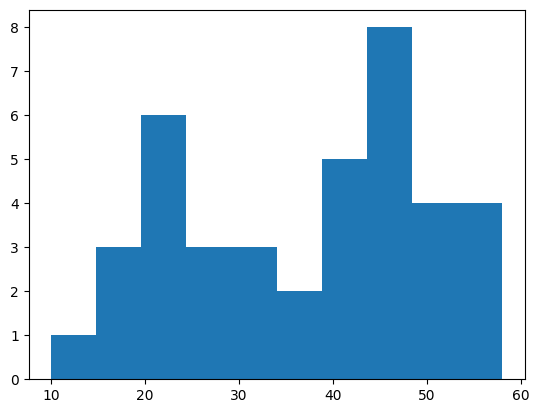

In [28]:
plt.hist(dict(Gsub.degree()).values())

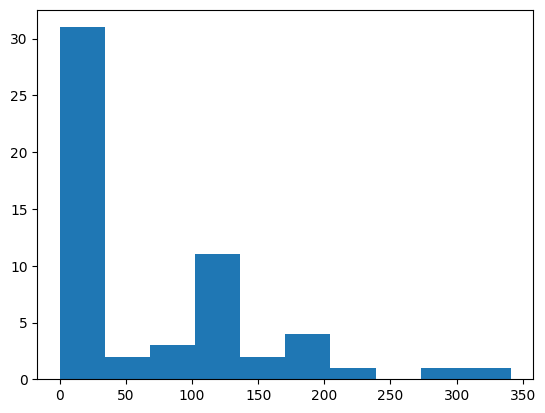

In [29]:
h = plt.hist(dict(G_2023.in_degree(weight='points')).values())

In [30]:
deg_cen_points = dict(G_2023.in_degree(weight='points'))
{k:deg_cen_points[k] for k in deg_cen_points if deg_cen_points[k]==max(deg_cen_points.values())}

{'Finland': 341}

In [31]:
page_rank = dict(nx.pagerank(G_2023,weight='points'))
{k:page_rank[k] for k in page_rank if page_rank[k]==max(page_rank.values())}

{'Finland': 0.07411402540350308}

In [32]:
between = dict(nx.betweenness_centrality(G_2023,weight='points'))
{k:between[k] for k in between if between[k]==max(between.values())}

{'Azerbaijan': 2493021.3213212136}

In [33]:
countries = pd.read_csv("C:\\Users\\user\\Downloads\\countries.csv",index_col='Country',encoding="cp1252")
countries.head()

cc2   cc3  numeric  latitude  longitude
Country                                               
Afghanistan     AF   AFG        4   33.0000       65.0
Albania         AL   ALB        8   41.0000       20.0
Algeria         DZ   DZA       12   28.0000        3.0
American Samoa  AS   ASM       16  -14.3333     -170.0
Andorra         AD   AND       20   42.5000        1.6

In [34]:
graph_nodes = set(G_2023.nodes())
country_index = set(countries.index)
print(G_2023.nodes)
print(countries.index)

['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Moldova', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Serbia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Andorra', 'Belarus', 'Bosnia & Herzegovina', 'Bulgaria', 'F.Y.R. Macedonia', 'Hungary', 'Luxembourg', 'Macedonia', 'Monaco', 'Montenegro', 'Morocco', 'North Macedonia', 'Rest of the World', 'Rest of the world', 'Romania', 'Russia', 'San Marino', 'Serbia & Montenegro', 'Slovakia', 'Turkey', 'Yugoslavia']
Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       ...
       'Venezuela', 'Viet Nam', 'Vietnam', 'Virgin Islands, British',
       'Virgin Islands, U.S.', 'Wallis and Futuna', 'Wester

In [35]:
missing_nodes = graph_nodes - country_index

In [36]:
print(missing_nodes)

{'Serbia & Montenegro', 'Yugoslavia', 'North Macedonia', 'Rest of the World', 'Rest of the world', 'Bosnia & Herzegovina', 'F.Y.R. Macedonia'}


In [37]:
corrections = {
    'Bosnia & Herzegovina': 'Bosnia and Herzegovina',
    'Rest of the world': 'Rest of the World',
    'Rest of the World': 'Rest of the World',
    'Serbia & Montenegro': 'Serbia',
    'Yugoslavia': 'Montenegro',
    'North Macedonia': 'Macedonia',
    'F.Y.R. Macedonia': 'Macedonia'
}
corrections.pop('Rest of the World', None)
corrections.pop('Rest of the World', None)

nx.relabel_nodes(G_2023, corrections, copy=False)


In [38]:
G_2023.remove_nodes_from(['Rest of the World'])

In [39]:
pos_geo = {node:
           ( max(-10,min(countries.loc[node]['longitude'],55)),
             max(countries.loc[node]['latitude'],25))
               for node in G_2023.nodes()}

In [40]:
pos_geo = {}
for node in G_2023.nodes():
    pos_geo[node] = (
                    max(-10,min(countries.loc[node]['longitude'],55)),
                    max(countries.loc[node]['latitude'],25)
    )

In [41]:
flags={}
flag_color = {}
for node in tqdm.tqdm_notebook(G_2023.nodes()):
    flag_path = 'C:\\Users\\user\\Downloads\\flags\\' + countries.loc[node]['cc3'].lower().replace(' ', '') + '.png'
#    print("Flag Path:", flag_path)
    flags[node] = flag_path
    flag_color[node] = ColorThief(flag_path).get_color(quality=1)

C:\Users\user\AppData\Local\Temp\ipykernel_3092\2352993044.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for node in tqdm.tqdm_notebook(G_2023.nodes()):


  0%|          | 0/50 [00:00<?, ?it/s]

In [42]:
def RGB(red,green,blue):
    return '#%02x%02x%02x' % (red,green,blue)

In [62]:
plt.figure(figsize=(8, 8))
ax=plt.gca()
fig=plt.gcf()
plt.axis('off')
plt.title('Eurovision 2023 Final Votes', fontsize=24)

pos = nx.layout.fruchterman_reingold_layout(G_2023,k=1,weight = 'points',iterations=1000,scale = 2)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

tick_params = {'top':'off', 'bottom':'off', 'left':'off', 'right':'off',
              'labelleft':'off', 'labelbottom':'off'}

styles = ['dotted','dashdot','dashed','solid']

for e in G_2023.edges(data=True):
    width = e[2]['points']/48
    style=styles[int(width*3)]
    if width>0.2:
        nx.draw_networkx_edges(G_2023,pos,edgelist=[e],width=width, style=style, edge_color = RGB(*flag_color[e[0]]) )


for node in G_2023.nodes():
    imsize = max((0.4*G_2023.in_degree(node,weight='points')
                  /max(dict(G_2023.in_degree(weight='points')).values()))**2,0.03)  # Adjusting flag size

    flag = matplotlib.image.imread(flags[node])

    (x,y) = pos[node]
    xx,yy = trans((x,y))
    xa,ya = trans2((xx,yy))

    country = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    country.imshow(flag)
    country.set_aspect('equal')
    country.tick_params(**tick_params)
    country.axis('off')

plt.savefig('eurovision2023_map.png', bbox_inches='tight')
plt.show()


In [79]:
!pip install google.colab

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [30 lines of output]
  <string>:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Traceback (most recent call last):
    File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
      return hook(config_settings)
             ^^^


     ---------------------------------------- 0.0/72.9 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/72.9 kB ? eta -:--:--
     ---------------- --------------------- 30.7/72.9 kB 445.2 kB/s eta 0:00:01
     -------------------------------------- 72.9/72.9 kB 574.7 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/11.8 MB 4.8 MB/s eta 0:00:03
      --------------------------------------- 0.2/11.8 MB 2.5 MB/s eta 0:00:05
     - ---------------------

In [82]:
import shutil
image_path = 'eurovision2023_map.png'
destination_folder = 'C:\\Users\\user\\Downloads\\'
shutil.copy(image_path, destination_folder)

'C:\\Users\\user\\Downloads\\eurovision2023_map.png'

In [51]:
degree_centrality = nx.degree_centrality(G_2023)

centrality_groups = defaultdict(list)
for node, centrality in degree_centrality.items():
    centrality_groups[centrality].append(node)

for centrality, nodes in centrality_groups.items():
    print(f"Degree Centrality = {centrality}: Nodes = {nodes}")

Degree Centrality = 1.693877551020408: Nodes = ['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Moldova', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Serbia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']
Degree Centrality = 0.7142857142857142: Nodes = ['Andorra', 'Belarus', 'Bulgaria', 'Hungary', 'Luxembourg', 'Macedonia', 'Monaco', 'Montenegro', 'Morocco', 'Romania', 'Russia', 'San Marino', 'Slovakia', 'Turkey', 'Bosnia and Herzegovina']


In [52]:
G_2023.remove_edges_from(nx.selfloop_edges(G_2023))
nx.k_core(G_2023, k=None, core_number=None).nodes

NodeView(('Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Moldova', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Serbia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'))

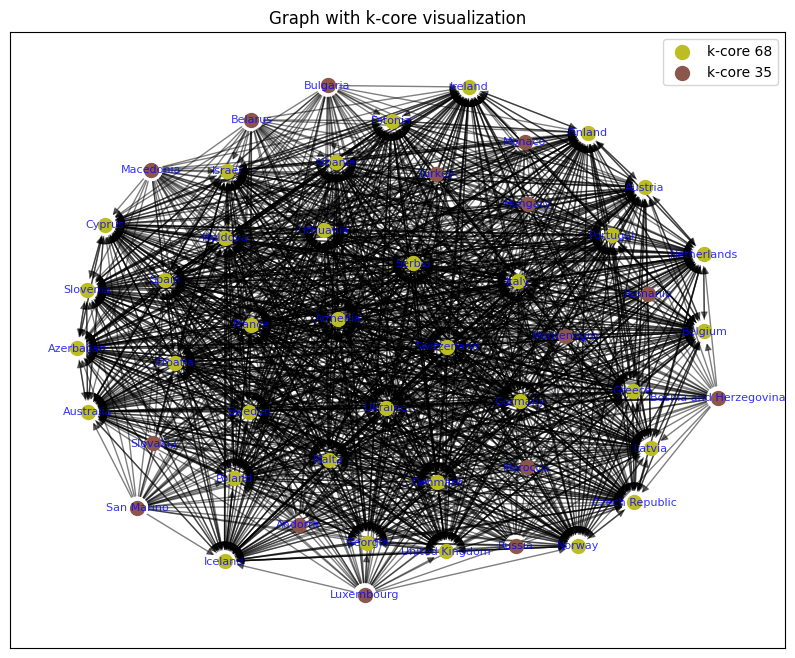

In [84]:
import networkx as nx
import matplotlib.pyplot as plt

k_cores = nx.core_number(G_2023)

k_core_nodes = {}
for node, k_core_value in k_cores.items():
    if k_core_value not in k_core_nodes:
        k_core_nodes[k_core_value] = [node]
    else:
        k_core_nodes[k_core_value].append(node)

pos = nx.spring_layout(G_2023) 
plt.figure(figsize=(10, 8))
for k, nodes in k_core_nodes.items():
    nx.draw_networkx_nodes(G_2023, pos, nodelist=nodes, node_size=100, node_color=f'C{k}', label=f'k-core {k}')
    for node in nodes:
        x, y = pos[node]
        plt.text(x, y, node, fontsize=8, ha='center', va='center', color='blue', alpha=0.8)

nx.draw_networkx_edges(G_2023, pos, alpha=0.5)
plt.title('Graph with k-core visualization')
plt.legend()
plt.show()


In [85]:
betweenness_centrality = nx.closeness_centrality(G_2023)

centrality_groups = defaultdict(list)
for node, centrality in betweenness_centrality.items():
    centrality_groups[centrality].append(node)

for centrality, nodes in centrality_groups.items():
    print(f"Betweenness Centrality = {centrality}: Nodes = {nodes}")

Betweenness Centrality = 1.0: Nodes = ['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Moldova', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Serbia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']
Betweenness Centrality = 0.0: Nodes = ['Andorra', 'Belarus', 'Bulgaria', 'Hungary', 'Luxembourg', 'Macedonia', 'Monaco', 'Montenegro', 'Morocco', 'Romania', 'Russia', 'San Marino', 'Slovakia', 'Turkey', 'Bosnia and Herzegovina']


In [61]:
eigenvector_centrality = nx.eigenvector_centrality(G_2023)

centrality_groups = defaultdict(list)
for node, centrality in eigenvector_centrality.items():
    centrality_groups[centrality].append(node)

for centrality, nodes in centrality_groups.items():
    print(f"Degree Centrality = {centrality}: Nodes = {nodes}")

Degree Centrality = 0.1690308509456956: Nodes = ['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Moldova', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Serbia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']
Degree Centrality = 7.815859180487766e-08: Nodes = ['Andorra', 'Belarus', 'Bulgaria', 'Hungary', 'Luxembourg', 'Macedonia', 'Monaco', 'Montenegro', 'Morocco', 'Romania', 'Russia', 'San Marino', 'Slovakia', 'Turkey', 'Bosnia and Herzegovina']


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:275: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


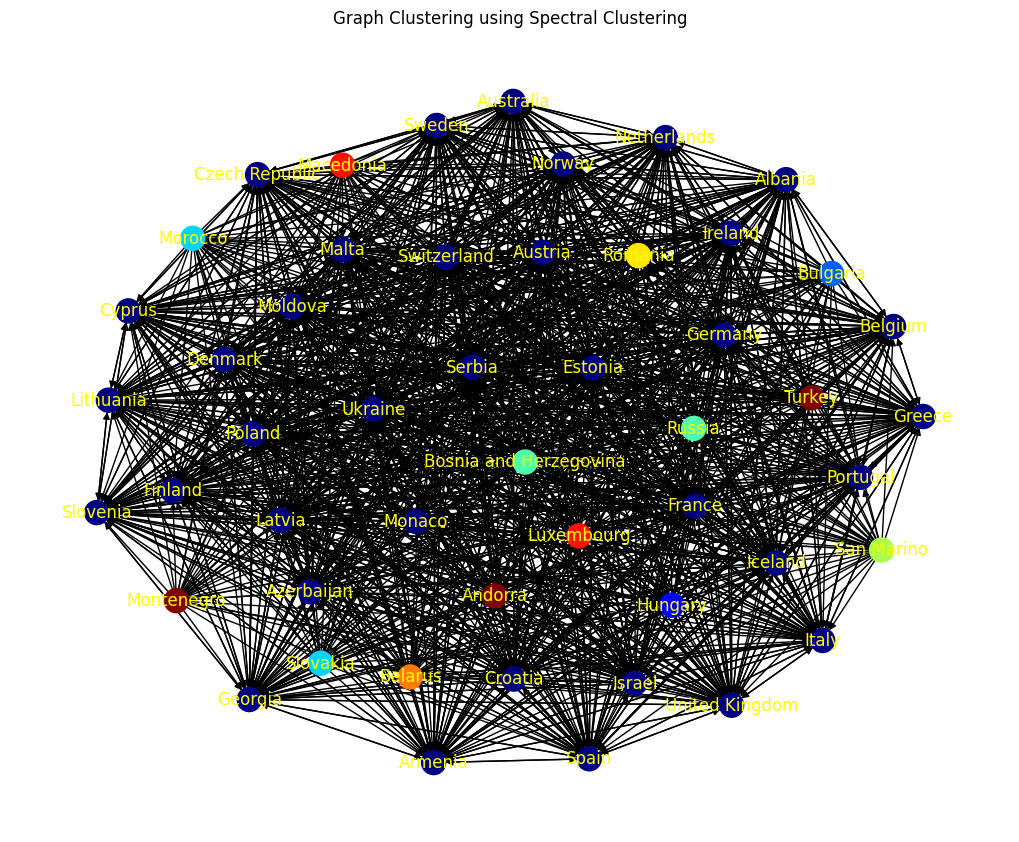

In [74]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=10, affinity='precomputed', assign_labels='discretize')
clusters = spectral.fit_predict(nx.to_numpy_array(G_2023))
pos = nx.spring_layout(G_2023)
plt.figure(figsize=(10, 8))
nx.draw(G_2023, pos, node_color=clusters, with_labels=True, cmap=plt.cm.jet, font_color='yellow')
plt.title('Graph Clustering using Spectral Clustering')
plt.show()
